In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기
titanic_df = pd.read_csv('./Data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
## 데이터 확인 및 EDA 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum())
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
데이터 세트 Null 값 갯수  0


In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
E46              1
E12              1
E36              1
B73              1
D56              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


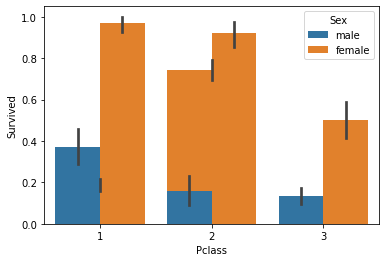

In [6]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df);

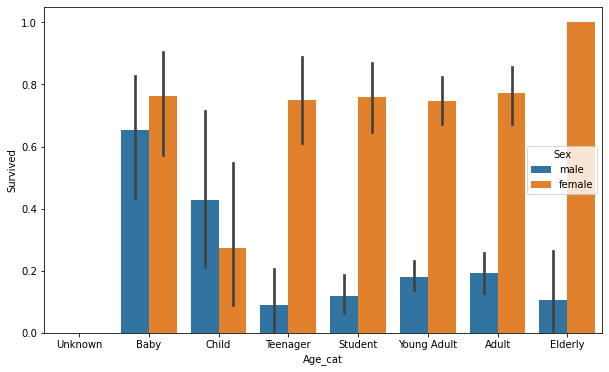

In [7]:
## 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [8]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [9]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [10]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
csv_data = pd.read_csv('./Data/titanic.csv')
titanic_target = csv_data['Survived']
titanic_data= csv_data.drop('Survived',axis=1)

titanic_data = transform_features(titanic_data)

print(titanic_data.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.0      1      0   7.2500      7         3
1       1    0  38.0      1      0  71.2833      2         0
2       3    0  26.0      0      0   7.9250      7         3
3       1    0  35.0      1      0  53.1000      2         3
4       3    1  35.0      0      0   8.0500      7         3


In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target=train_test_split(titanic_data, titanic_target, test_size=0.2, random_state=42)
                                                  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 결정트리를 위한 사이킷런 Classifier 클래스 생성
dt_model = DecisionTreeClassifier(random_state=42)

# DecisionTreeClassifier 학습/예측/평가
dt_model.fit(train_data , train_target)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(dt_model.score(test_data, test_target)))

DecisionTreeClassifier 정확도: 0.7709


In [12]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt_model, train_data , train_target)
print(scores)

{'fit_time': array([0.00900984, 0.01299381, 0.0039885 , 0.00495124, 0.00493264]), 'score_time': array([0.00300479, 0.00308657, 0.00101042, 0.00811172, 0.00295615]), 'test_score': array([0.76223776, 0.71328671, 0.76056338, 0.82394366, 0.80985915])}


In [13]:
print(np.mean(scores['test_score']))

0.7739781345415148


In [14]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt_model, train_data, train_target, cv = StratifiedKFold())
print(np.mean(scores["test_score"]))

0.7739781345415148


In [15]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt_model, train_data, train_target, cv = splitter)
print(np.mean(scores["test_score"]))

0.7527973395931142


In [16]:
from sklearn.model_selection import GridSearchCV
params = {"min_impurity_decrease":[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs_model = GridSearchCV(dt_model, params, n_jobs = -1)
gs_model.fit(train_data, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [17]:
dt = gs_model.best_estimator_
print(dt.score(train_data, train_target))

0.952247191011236


In [18]:
print(gs_model.best_params_)

{'min_impurity_decrease': 0.0005}


In [19]:
print(gs_model.cv_results_["mean_test_score"])

[0.76834433 0.76694573 0.77534719 0.77254014 0.78516695]


In [20]:
best_index = np.argmax(gs_model.cv_results_["mean_test_score"])
print(gs_model.cv_results_["params"][best_index])

{'min_impurity_decrease': 0.0005}


In [21]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [22]:
gs_model = GridSearchCV(dt_model, params, n_jobs = -1)
gs_model.fit(train_data, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [23]:
print(gs_model.best_params_)

{'max_depth': 6, 'min_impurity_decrease': 0.0001, 'min_samples_split': 12}


In [24]:
print(np.max(gs_model.cv_results_["mean_test_score"]))

0.8160248202501723


In [25]:
from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [26]:
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(dt_model, params, n_iter=100, n_jobs=-1, random_state=42)
rs_model.fit(train_data, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE6955550>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE69553D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE66547C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE6654280>},
                   random_state=42)

In [27]:
print(rs_model.best_params_)

{'max_depth': 38, 'min_impurity_decrease': 0.0007803075385877798, 'min_samples_leaf': 9, 'min_samples_split': 8}


In [28]:
print(np.max(rs_model.cv_results_["mean_test_score"]))

0.8216684723726978


In [29]:
dt =rs_model.best_estimator_
print(dt.score(test_data, test_target))

0.8156424581005587


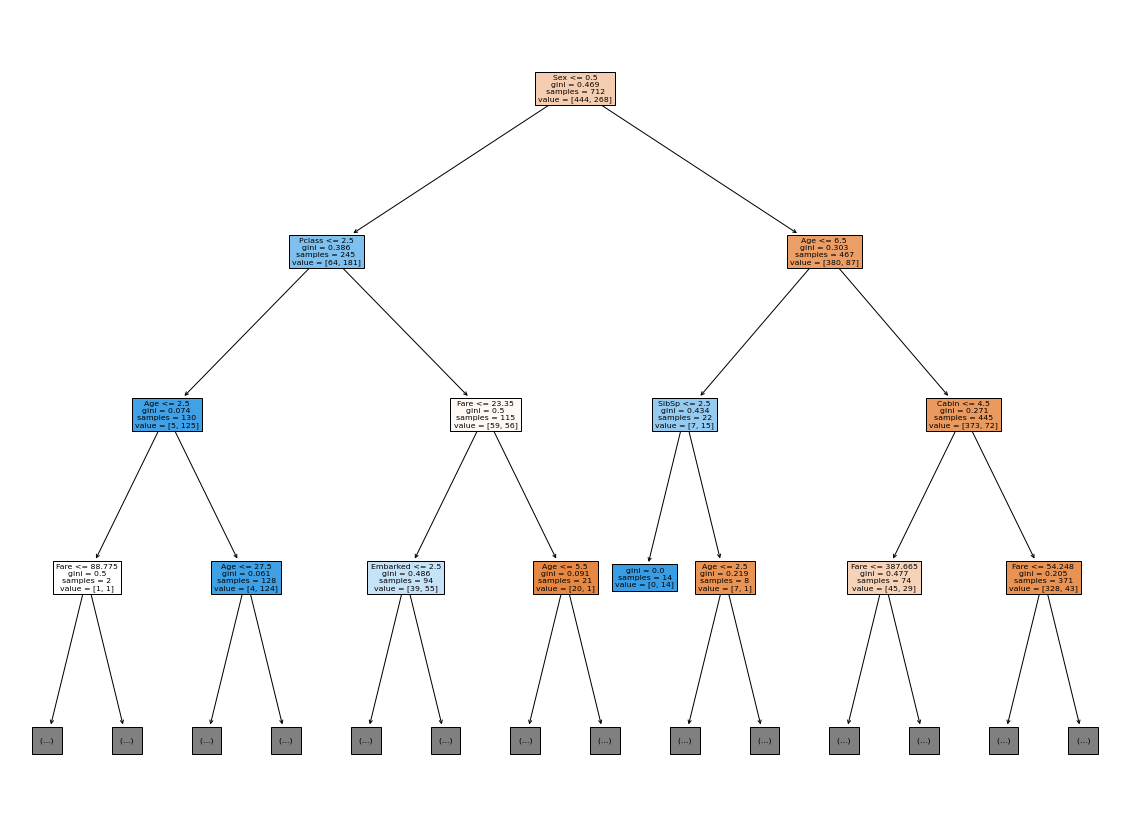

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt_model, max_depth=3, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])
plt.show()

In [31]:
#Random Forest를 위한 사이킷런 Classifier 클래스 생성
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
scores = cross_validate(rf_model, train_data, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.9870076773656461 0.7991923569388357


In [33]:
rf_model.fit(train_data, train_target)
print(rf_model.feature_importances_)

[0.06989071 0.26324235 0.23619162 0.04798161 0.03934936 0.24700128
 0.06251759 0.03382548]


In [34]:
rf_model = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf_model.fit(train_data, train_target)
print(rf_model.oob_score_)

0.8047752808988764


In [37]:
rs_rf_model = RandomizedSearchCV(rf_model, params, n_iter=100, n_jobs=-1, random_state=42)
rs_rf_model.fit(train_data, train_target)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE6955550>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE69553D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE66547C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AE6654280>},
                   random_state=42)

In [36]:
print(rs_rf_model.best_params_)

{'max_depth': 28, 'min_impurity_decrease': 0.000404781258158029, 'min_samples_leaf': 6, 'min_samples_split': 9}


In [40]:
pred_data = [
    [1, 1, 54.0, 1, 0, 53.1, 2, 3],
    [3, 1, 54.0, 1, 0, 7.25, 7, 3]]
print(rs_rf_model.predict(pred_data))

[0 0]


In [41]:
pred_data2 = [
    [1, 0, 54.0, 1, 0, 53.1, 2, 3],
    [3, 0, 54.0, 1, 0, 7.25, 7, 3]]
print(rs_rf_model.predict(pred_data2))

[1 0]


In [45]:
params = {'min_impurity_decrease': 0.0004,
          'max_depth': 28,
          'min_samples_split':6,
          'min_samples_leaf': 9,
          }

In [46]:
rs_rf_model = RandomizedSearchCV(rf_model, params, n_iter=100, n_jobs=-1, random_state=42)
rs_rf_model.fit(train_data, train_target)

TypeError: Parameter value is not iterable or distribution (key='min_impurity_decrease', value=0.0004)

In [42]:
dt =rs_rf_model.best_estimator_
print(dt.predict(pred_data))
print(dt.predict(pred_data2))

[0 0]
[1 0]
